# Images in frequency domain

We can process images in the frequency domain by fourier transforming them. This is a simple task with numpy and python, as numpy has existing functionality for it. 

There are multiple reasons for wanting to process an image in the frequency domain instead of the spatial domain. For instance will repetitive noise in the spatial domain become points in the frequncy domain, and are thus easier to remove. Another important point is that convolution operations in the spatial domain become pointwise multiplication in the frequency domain which is less computationally demanding.

## First encounter

Numpy has fourier transforms in the module [np.fft](https://numpy.org/doc/stable/reference/routines.fft.html). When we apply the fourier transform, numpy will put the zero-frequency at index 0, the indices 1: n/2 + 1 contain the positive frequency components and the indices n/2 + 1 : n contain the negative frequencies. In order to visually display the transformed image we usually want the zero-frequency in the middel for the image. For this, numpy provides the function [np.fft.fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html#numpy.fft.fftshift) which centers the image.

The following code wil declare a repeating pattern in the spatial domain, transform it to the frequency domain and display the result.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, interact_manual, FloatSlider
import ipywidgets as widgets

def display_fft(image):
    return np.log(1 + np.absolute(np.fft.fftshift(image)))

def make_sinus_image(im_size, frequency):
    return np.array([[np.sin(frequency*np.pi*2*i/im_size) for i in range(im_size)] for j in range(im_size)])


def display_image_with_fft(image):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(image, cmap = "gray")
    
    fft_im = np.fft.fft2(image)
    plt.subplot(1,2,2)
    plt.imshow(display_fft(fft_im), cmap = "gray")
    plt.show()

def display_sinus(frequency):
    display_image_with_fft(make_sinus_image(32, frequency))

_ = interact(display_sinus, frequency = widgets.IntSlider(min=0, max=15, step=1, value=2))

interactive(children=(IntSlider(value=2, description='frequency', max=15), Output()), _dom_classes=('widget-in…

As we can see from this example horisiontal sinusoidals become impulses on the horisontal axis in the fourier domain. The position of the impulses is dependent on the frequency of the sinus signals.

Each pixel in the fourier domain represents a sinusoidal with one specific frequency in the spatial domain. The distance from origo in the frequency domain determines the frequency of the sinusoidal, and the angle determines direction of the sinusoidal. This can be demonstrated in numpy like this:

In [5]:
def visualize_fft_and_inverse(fft_image):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(fft_image, cmap="gray")
    spatial = np.fft.ifft2(np.fft.ifftshift(fft_image)).real
    plt.subplot(1,2,2)
    plt.imshow(spatial, cmap = "gray")
    plt.show()

    
def transform_of_point(x, y):
    image = np.zeros((32,32))
    image[y,x] = 1.
    visualize_fft_and_inverse(image)

    
_ = interact(transform_of_point,x=widgets.IntSlider(min=0, max=31, step=1, value=16),\
             y=widgets.IntSlider(min=0, max=31, step=1, value=16))
    

interactive(children=(IntSlider(value=16, description='x', max=31), IntSlider(value=16, description='y', max=3…

Multiple frequencies can be combined into all sorts of patterns. If you have enough different frequencies you can represent any image. Check out what sort of patterns you can represent with two points in the fourier domain:

In [7]:
def transform_of_point(x, y, x1, y1):
    image = np.zeros((32,32))
    image[y,x] = 1.
    image[y1, x1] = 1.
    visualize_fft_and_inverse(image)

    
_ = interact(transform_of_point,x=widgets.IntSlider(min=0, max=31, step=1, value=16),\
             y=widgets.IntSlider(min=0, max=31, step=1, value=16),
             x1=widgets.IntSlider(min=0, max=31, step=1, value=16),\
             y1=widgets.IntSlider(min=0, max=31, step=1, value=16))
    

interactive(children=(IntSlider(value=16, description='x', max=31), IntSlider(value=16, description='y', max=3…

An important result from the fourier analysis states that all periodic, piecewise continous functions can be represented by a sum of trigonometric functions. This means that other, more complex structures and patterns may be decomposed into sums of sinus and cosinus functions. Here, this will be demonstrated by converting a square-impulse-function to the frequency-domain

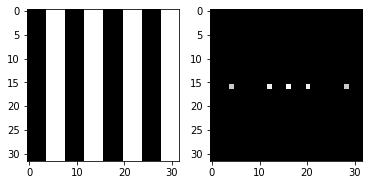

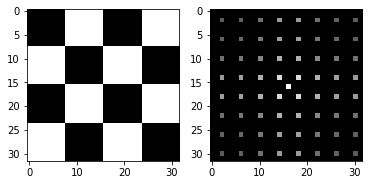

In [3]:
square_impulse_image = np.array([[1. if i%8 > 3 else 0. for i in range(32)] for j in range(32)])
checkers = np.array([[1. if (i%16> 7)^(j % 16 > 7)   else 0. for i in range(32)] for j in range(32)])
display_image_with_fft(square_impulse_image)
display_image_with_fft(checkers)

We can demonstrate how the fourier representation is an approximation by limiting the range of frequencies used to represent the image. We incrementally increase the number of frequencies used to reperesent the signal and see how the reconstruction quality increases.

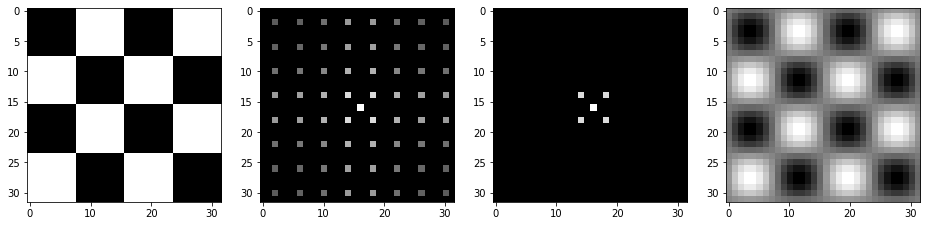

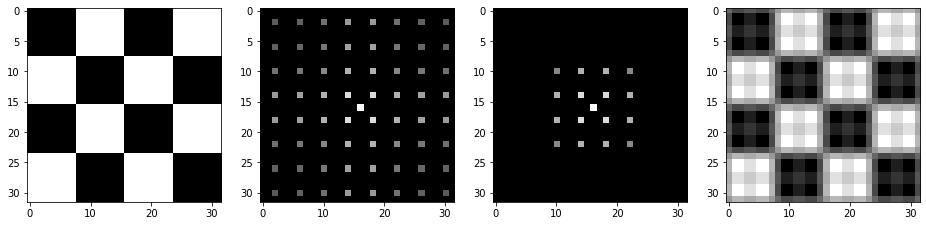

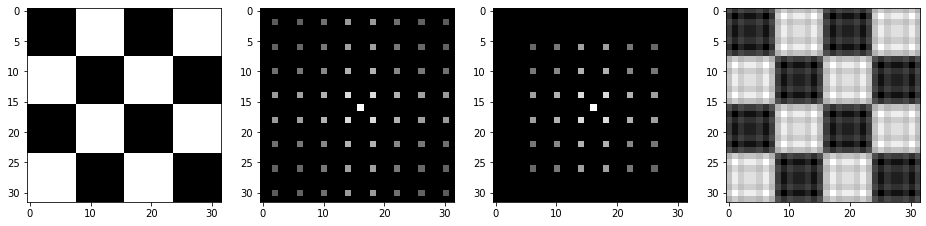

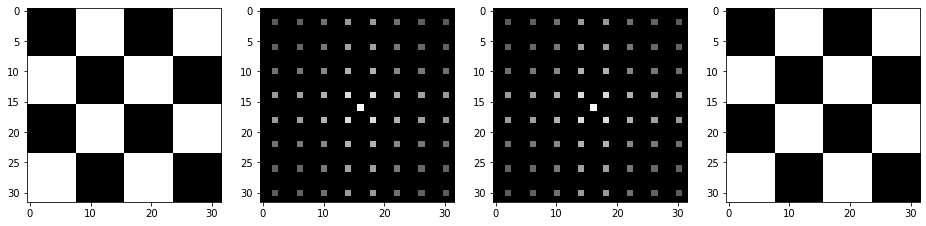

In [4]:
def display_image_and_reconstruction(image, mask):
    fft_im = np.fft.fft2(image)
    
    plt.figure(figsize = (16,8))
    plt.subplot(1,4,1)
    plt.imshow(image, cmap = "gray")
    plt.subplot(1,4,2)
    plt.imshow(display_fft(fft_im), cmap = "gray")
    fft_im *= np.fft.ifftshift(mask)
    plt.subplot(1,4,3)
    plt.imshow(display_fft(fft_im), cmap ="gray")
    plt.subplot(1,4,4)
    plt.imshow(np.fft.ifft2(fft_im).real, cmap = "gray")
    plt.show()
    

mask = np.zeros((32,32))
mask[14:19, 14:19] = 1.
display_image_and_reconstruction(checkers, mask)
    
mask = np.zeros((32,32))
mask[10:23, 10:23] = 1.
display_image_and_reconstruction(checkers, mask)

mask = np.zeros((32,32))
mask[6:27, 6:27] = 1.
display_image_and_reconstruction(checkers, mask)


mask = np.ones((32,32))
display_image_and_reconstruction(checkers, mask)

## Looking at images
Simple repetative patterns will have simple repetative fourier transforms. Transforming real images will give quite different results. Here we will look at a simple image of Gløshaugen, and see how it looks like in the fourier domain.

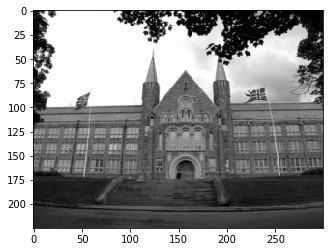

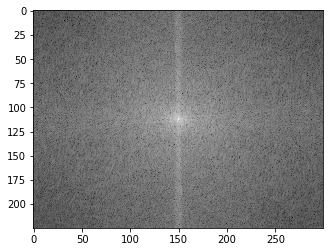

In [5]:
image_path = "images/gloshaugen.jpg"
def convert_rgb_to_gray(image):
    return np.dot(image[...,:], [0.2989, 0.5870, 0.1140])

image = convert_rgb_to_gray(plt.imread(image_path))
plt.imshow(image, cmap = "gray")
plt.show()

fft_im = np.fft.fft2(image)
plt.imshow(display_fft(fft_im), cmap = "gray")
plt.show()

It is difficult to recognise any structures from the original image in the fourier transformed image. We can take note that the fourier image has a bright vertical line, which may correspond to horisontal lines in the input image. We should also take note that the brightest region is the center. This is common for almost all images, as the center represents the average pixel value in the image.

We can use the fourier representation to low-pass and high-pass filter the input image.

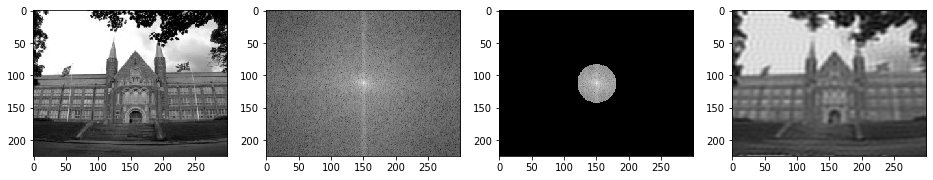

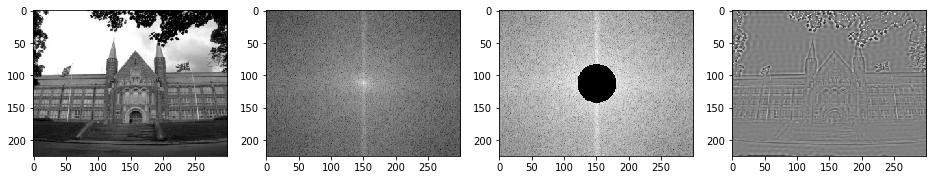

In [6]:
im_shape = image.shape
low_pass_filter = np.array([[1. if (i - im_shape[1]/2)**2 + (j-im_shape[0]/2)**2 < 900 else 0.\
                             for i in range(im_shape[1])] for j in range(im_shape[0])])

high_pass_filter = 1 - low_pass_filter


display_image_and_reconstruction(image, low_pass_filter)
display_image_and_reconstruction(image, high_pass_filter)


## Filtering out noise

Using what we have learnt so far we can try to filter a noisy image. The following lines of code imports an image with repetative noise that we want to remove. We can do so by transforming the image into the fourierdomain and removing the noise frequencies there.

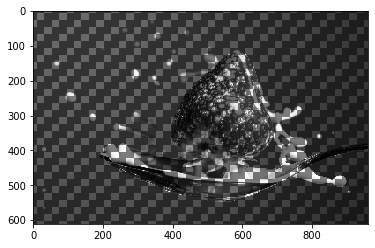

In [7]:
image = plt.imread("images/noisy_strawberry.png")[:,:,0]
plt.imshow(image, cmap = "gray")
plt.show()

Our first step is to inspect the fourier transformed image.

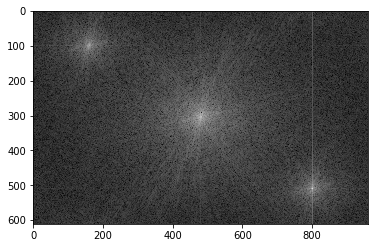

In [8]:
fft_image = np.fft.fft2(image)
plt.imshow(display_fft(fft_image), cmap = "gray")
plt.show()

This image has two extra bright areas in addition to the center. These represent the noise in the original image. In order to remove the noise we can construct a filter that removes exactly those two areas and leaves everything else untouched. When constructing this filter the axes provided by matplotlib come in handy.

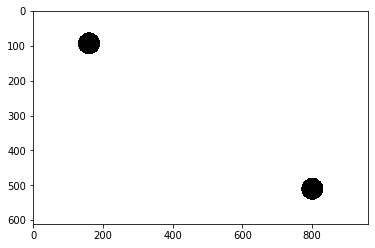

In [9]:
mask = np.ones(image.shape)
for i in range(400,600):
    for j in range(700,900):
        if((i-510)**2 + (j-800)**2 < 1000):
            mask[i,j] = 0.
            
for i in range(50,150):
    for j in range(100,200):
        if((i-95)**2 + (j-160)**2 < 1000):
            mask[i,j] = 0.
plt.imshow(mask, cmap = "gray")
plt.show()
mask = np.fft.ifftshift(mask)

The next step is to simply multiply our fourier transformed image with the filter. 

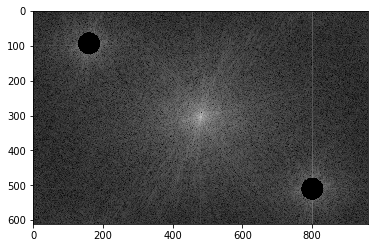

In [10]:
fft_image *= mask
plt.imshow(display_fft(fft_image), cmap = "gray")
plt.show()

Lastly, we reconstruct the image in spatial domain through the inverse transform.

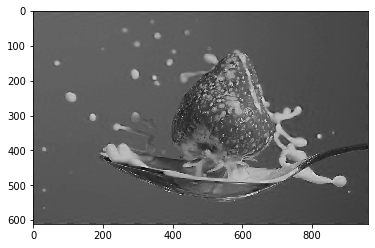

In [11]:
image = np.fft.ifft2(fft_image).real
plt.imshow(image, cmap = "gray")
plt.show()

## Exercise
Try to remove the noise from the following image using everything you have learnt so far this course.

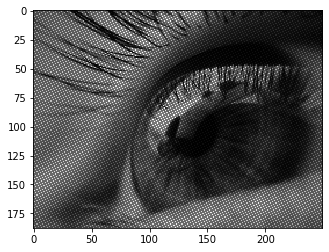

In [12]:
image_path = "images/noisy_eye.png"
image = plt.imread(image_path)[:,:,0]
plt.imshow(image, cmap = "gray")
plt.show()


### Example solution

First we view the image in the fourier domain and take note of where the noise is.

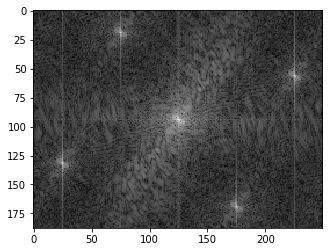

In [13]:
fft_im = np.fft.fft2(image)
plt.imshow(display_fft(fft_im), cmap = "gray")
plt.show()

Then we construct a filter which filters out the noise.

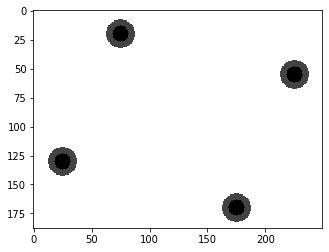

In [14]:
mask = np.ones(image.shape)

for i in range(0,50):
    for j in range(50,100):
        if((i-20)**2 + (j-75)**2 < 50):
            mask[i,j] = 0.05
        elif((i-20)**2 + (j-75)**2 < 150):
            mask[i,j] = 0.3
            
for i in range(100,150):
    for j in range(0,50):
        if((i-130)**2 + (j-25)**2 < 50):
            mask[i,j] = 0.05
        elif((i-130)**2 + (j-25)**2 < 150):
            mask[i,j] = 0.3 

for i in range(25,75):
    for j in range(200,250):
        if((i-55)**2 + (j-225)**2 < 50):
            mask[i,j] = 0.05
        elif((i-55)**2 + (j-225)**2 < 150):
            mask[i,j] = 0.3


for i in range(150,188):
    for j in range(150,200):
        if((i-170)**2 + (j-175)**2 < 50):
            mask[i,j] = 0.05
        elif((i-170)**2 + (j-175)**2 < 150):
            mask[i,j] = 0.3
plt.imshow(mask, cmap = "gray")
plt.show()
mask = np.fft.ifftshift(mask)

Lastly we reconstruct our image by multiplying the mask with the image in the fourier domain and inverse-transforming the result. As an additional enchantment, this solution applies histogram equalization to improve the contrast of the resulting image.

In [15]:
def histogram_eq(image):
    hist, bins = np.histogram(image, 256)
    cumulative_hist = np.zeros(256)
    cumulative_hist[0] = hist[0]
    for i in range(1, 256):
        cumulative_hist[i] = cumulative_hist[i-1] + hist[i]
    cumulative_hist /= cumulative_hist[-1]
    table = (cumulative_hist * 255).astype(np.uint8)
    new_im = table[image[:,:]]
    return new_im


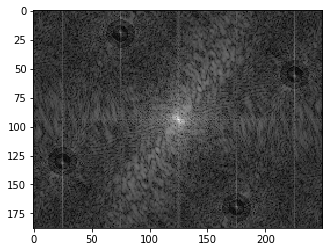

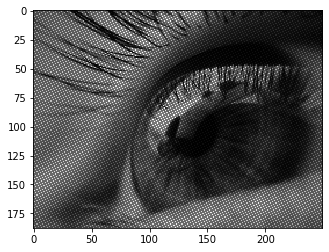

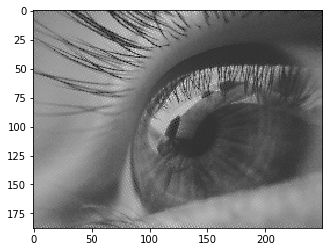

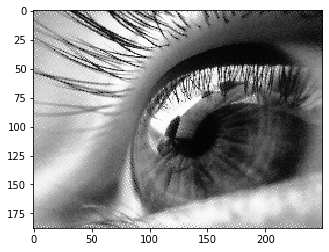

In [16]:
plt.imshow(display_fft(fft_im*mask), cmap="gray")
plt.show()

plt.imshow(image, cmap = "gray")
plt.show()
reconstruct = np.fft.ifft2(fft_im*mask).real
reconstruct -= reconstruct.min()
reconstruct /= reconstruct.max()

reconstruct *= 255.
reconstruct = reconstruct.astype(np.uint8)
plt.imshow(reconstruct, cmap = "gray")
plt.show()
reconstruct = histogram_eq(reconstruct)
plt.imshow(reconstruct, cmap = "gray")
plt.show()